<a href="https://colab.research.google.com/github/vedmara/project/blob/main/Project_phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Background

Indication: Low Back Pain ( LBP)

Parallel, double blind,Multicentric Phase III Clinical Trial ( 4 centers)

Number of treatments: 03

Treatments: Test, Reference and Placebo

Sample Size: n=780

Visits: Day 1( V1), Day 3( V2) and Day 7(V3)

Primary End Point: Visual Analogue Scale (VAS)

Scale: 0-100 mm

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
aedata=pd.read_csv("/content/drive/MyDrive/Project/AE DATA.csv")
aedata.head()
#aedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Patient_ID   780 non-null    object
 1   AE           780 non-null    object
 2   AE_REL       68 non-null     object
 3   AE_SEVERITY  68 non-null     object
dtypes: object(4)
memory usage: 24.5+ KB


In [3]:
baselinedata=pd.read_csv('/content/drive/MyDrive/Project/Baseline Characteristics.csv')
baselinedata.head()
#baselinedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Patient_ID  780 non-null    object
 1   Work        780 non-null    object
 2   Surgery_1Y  780 non-null    object
dtypes: object(3)
memory usage: 18.4+ KB


In [4]:
demografdata=pd.read_csv('/content/drive/MyDrive/Project/Demographics.csv')
demografdata.head()
#demografdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Patient_ID  780 non-null    object
 1   Age         780 non-null    int64 
 2   Gender      780 non-null    object
dtypes: int64(1), object(2)
memory usage: 18.4+ KB


In [5]:
globaldata=pd.read_csv('/content/drive/MyDrive/Project/Global Assessment.csv')
globaldata.head()
#globaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Patient_ID  780 non-null    object
 1   PGA         780 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.3+ KB


In [6]:
randomazedata=pd.read_csv('/content/drive/MyDrive/Project/Randomization.csv')
randomazedata.head()
#randomazedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Patient_ID  780 non-null    object
 1   Treatment   780 non-null    object
 2   Center      780 non-null    object
dtypes: object(3)
memory usage: 18.4+ KB


In [7]:
studydata=pd.read_csv('/content/drive/MyDrive/Project/Study Populations.csv')
studydata.head()
#studydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Patient_ID  780 non-null    object
 1   ITT         780 non-null    object
 2   PP          780 non-null    object
dtypes: object(3)
memory usage: 18.4+ KB


In [8]:
vasdata=pd.read_csv('/content/drive/MyDrive/Project/VAS Data.csv')
vasdata.head()
#vasdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Patient_ID  5460 non-null   object
 1   Day         5460 non-null   object
 2   VAS         5460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 128.1+ KB


In [9]:
vitaldata=pd.read_csv('/content/drive/MyDrive/Project/Vital Signs.csv')
vitaldata.head()
#vitaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Patient_ID                       780 non-null    object
 1   PR                               780 non-null    int64 
 2   Pulse rate (beats/min)           780 non-null    object
 3   RR                               780 non-null    int64 
 4   Respiratory rate (breaths/min)   780 non-null    object
 5   SBP                              780 non-null    int64 
 6   Systolic blood pressure (mmHg)   780 non-null    object
 7   DBP                              780 non-null    int64 
 8   Diastolic blood pressure (mmHg)  780 non-null    object
dtypes: int64(4), object(5)
memory usage: 55.0+ KB


In [10]:
# Merge datasets
merged_data = pd.merge(randomazedata, studydata, on='Patient_ID', how='inner')
merged_data = pd.merge(merged_data, demografdata, on='Patient_ID', how='inner')
merged_data = pd.merge(merged_data, baselinedata, on='Patient_ID', how='inner')
merged_data = pd.merge(merged_data, vitaldata, on='Patient_ID', how='inner')
#merged_data.info()
merged_data.head()

,Patient_ID,Treatment,Center,ITT,PP,Age,Gender,Work,Surgery_1Y,PR,Pulse rate (beats/min),RR,Respiratory rate (breaths/min),SBP,Systolic blood pressure (mmHg),DBP,Diastolic blood pressure (mmHg)
0,PID/001,PLACEBO,C1,YES,YES,24,Female,FT,NO,77,BEATS/MIN,16,BREATHS/MIN,110,MMHG,80,MMHG
1,PID/002,TEST,C3,YES,YES,25,Male,FT,NO,74,BEATS/MIN,17,BREATHS/MIN,122,MMHG,70,MMHG
2,PID/003,TEST,C2,YES,YES,22,Female,FT,NO,86,BEATS/MIN,14,BREATHS/MIN,120,MMHG,80,MMHG
3,PID/004,TEST,C1,YES,YES,54,Female,FT,NO,84,BEATS/MIN,16,BREATHS/MIN,124,MMHG,82,MMHG
4,PID/005,PLACEBO,C1,YES,YES,57,Male,FT,NO,84,BEATS/MIN,15,BREATHS/MIN,110,MMHG,80,MMHG


In [11]:
demographics_summary = merged_data.groupby(['Center', 'Treatment']).agg({
   'Age': ['mean', 'std'],
   'Gender': lambda x: x.mode()[0],  # Most frequent gender
}).reset_index()

print("Demographics Summary:")
print(demographics_summary)

Demographics Summary:
   Center Treatment        Age              Gender
                          mean        std <lambda>
0      C1   PLACEBO  39.884058  12.985893   Female
1      C1       REF  41.000000  11.207928     Male
2      C1      TEST  35.942308  12.054474   Female
3      C2   PLACEBO  38.721311  12.248988     Male
4      C2       REF  39.163636  12.425725   Female
5      C2      TEST  41.640000  13.519395     Male
6      C3   PLACEBO  40.840000  12.092034     Male
7      C3       REF  39.657143  11.968419   Female
8      C3      TEST  38.981481  13.112706     Male
9      C4   PLACEBO  41.000000  12.216482     Male
10     C4       REF  39.925373  13.008521     Male
11     C4      TEST  37.287879  11.863020   Female


In [12]:
# Summary table of baseline characteristics by treatment groups for each center
baseline_summary = merged_data.groupby(['Center', 'Treatment']).agg({
   'Work': lambda x: x.mode()[0],  # Most frequent work status
   'Surgery_1Y': lambda x: x.mode()[0],  # Most frequent surgery status
}).reset_index()

print("\nBaseline Characteristics Summary:")
print(baseline_summary)


Baseline Characteristics Summary:
   Center Treatment Work Surgery_1Y
0      C1   PLACEBO   FT         NO
1      C1       REF   FT         NO
2      C1      TEST   FT         NO
3      C2   PLACEBO   FT         NO
4      C2       REF   FT         NO
5      C2      TEST   FT         NO
6      C3   PLACEBO   FT         NO
7      C3       REF   FT         NO
8      C3      TEST   FT         NO
9      C4   PLACEBO   FT         NO
10     C4       REF   FT         NO
11     C4      TEST   FT         NO


In [13]:
vital_summary = merged_data.groupby(['Center', 'Treatment']).agg({
   'PR': ['mean', 'std'],
   'RR': ['mean', 'std'],
   'SBP': ['mean', 'std'],
   'DBP': ['mean', 'std']
}).reset_index()

print("\nVital Signs Summary:")
print(vital_summary)


Vital Signs Summary:
   Center Treatment         PR                   RR                   SBP  \
                          mean       std       mean       std        mean   
0      C1   PLACEBO  80.057971  5.384848  16.521739  1.922075  119.130435   
1      C1       REF  80.000000  4.290893  16.289855  2.058708  118.927536   
2      C1      TEST  79.769231  4.976870  15.961538  1.342540  119.615385   
3      C2   PLACEBO  79.409836  4.529080  16.081967  1.744468  119.114754   
4      C2       REF  79.527273  5.006864  16.072727  1.537850  119.745455   
5      C2      TEST  80.026667  5.462336  16.066667  1.926580  118.773333   
6      C3   PLACEBO  79.506667  4.998306  16.253333  1.724962  119.173333   
7      C3       REF  78.942857  4.913412  16.085714  1.369892  117.942857   
8      C3      TEST  79.777778  4.936069  16.407407  1.848186  120.444444   
9      C4   PLACEBO  79.582090  4.472642  16.059701  1.475873  118.626866   
10     C4       REF  78.746269  5.185479  15.597015  1

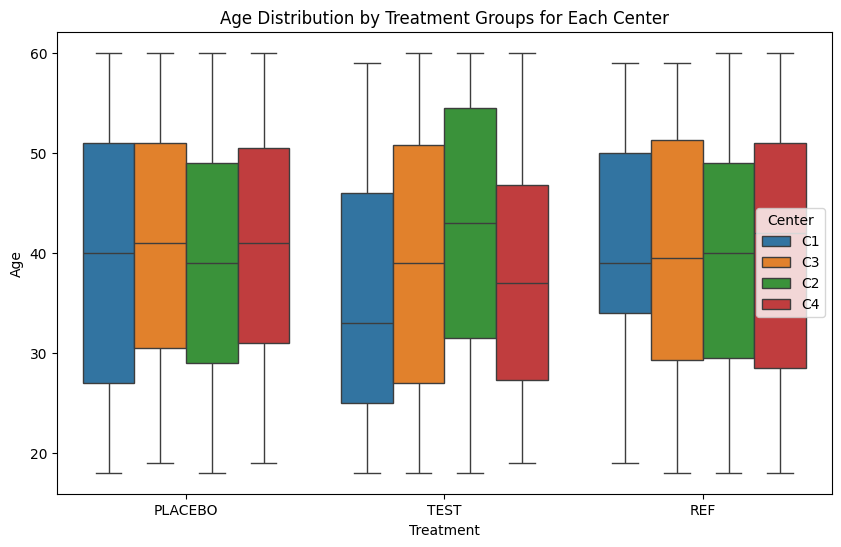

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='Treatment', y='Age', hue='Center')
plt.title('Age Distribution by Treatment Groups for Each Center')
plt.xlabel('Treatment')
plt.ylabel('Age')
plt.legend(title='Center')
plt.show()

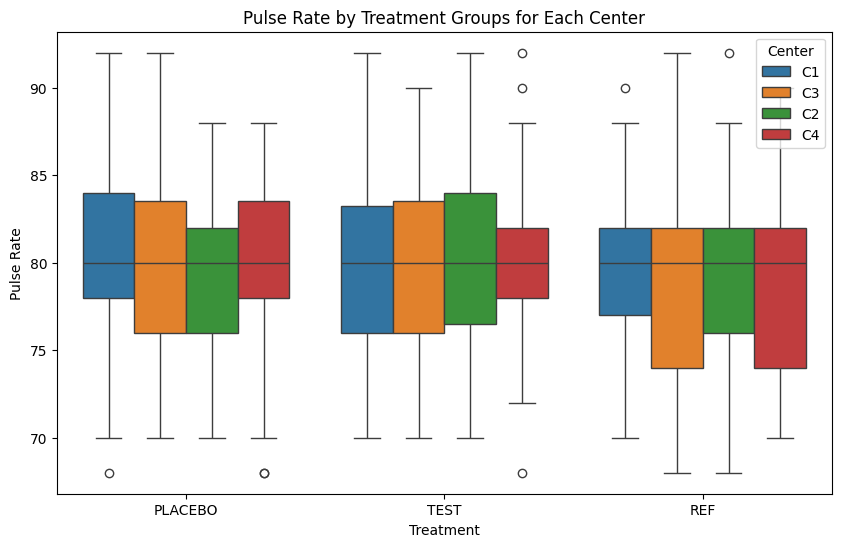

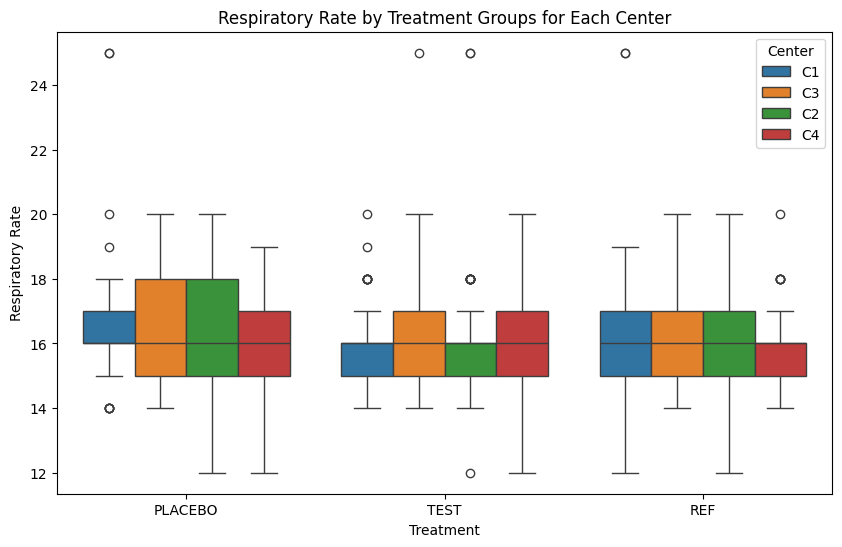

In [15]:
# Pulse Rate
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='Treatment', y='PR', hue='Center')
plt.title('Pulse Rate by Treatment Groups for Each Center')
plt.xlabel('Treatment')
plt.ylabel('Pulse Rate')
plt.legend(title='Center')
plt.show()

# Respiratory Rate
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='Treatment', y='RR', hue='Center')
plt.title('Respiratory Rate by Treatment Groups for Each Center')
plt.xlabel('Treatment')
plt.ylabel('Respiratory Rate')
plt.legend(title='Center')
plt.show()

Phase 2: Preliminary Analysis of VAS, AE, and Global Assessment

In [20]:
# Merge Randomization and VAS Data
# Merge randomization and VAS data
vas_merged_data = randomazedata.merge(vasdata, on='Patient_ID', how='inner')

# Check merged data
vas_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Patient_ID  5460 non-null   object
 1   Treatment   5460 non-null   object
 2   Center      5460 non-null   object
 3   Day         5460 non-null   object
 4   VAS         5460 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 213.4+ KB


In [21]:
# Summarize VAS for Each Day
# Summary statistics of VAS by day and treatment groups
summary_stats = vas_merged_data.groupby(['Treatment', 'Day']).agg({
    'VAS': ['count', 'mean', 'std', 'median', 'min', 'max']
}).reset_index()

print(summary_stats)

   Treatment   Day   VAS                                     
                   count       mean        std median min max
0    PLACEBO  DAY1   272  64.555147  14.558594   66.0  22  91
1    PLACEBO  DAY2   272  57.363971  14.177703   58.0  18  86
2    PLACEBO  DAY3   272  49.022059  16.324643   51.0   0  77
3    PLACEBO  DAY4   272  41.106618  15.079116   45.0   0  68
4    PLACEBO  DAY5   272  35.216912  15.206840   36.5   0  60
5    PLACEBO  DAY6   272  31.356618  17.269986   29.0   0  68
6    PLACEBO  DAY7   272  28.000000  18.209523   26.0   0  69
7        REF  DAY1   261  63.406130  16.751458   72.0  16  87
8        REF  DAY2   261  46.735632  19.881259   48.0   0  81
9        REF  DAY3   261  29.593870  21.475474   29.0   0  77
10       REF  DAY4   261  21.823755  17.683314   24.0   0  66
11       REF  DAY5   261  17.567050  15.756083   19.0   0  65
12       REF  DAY6   261  13.337165  14.629571    4.0   0  64
13       REF  DAY7   261  11.111111  13.987051    3.0   0  62
14      

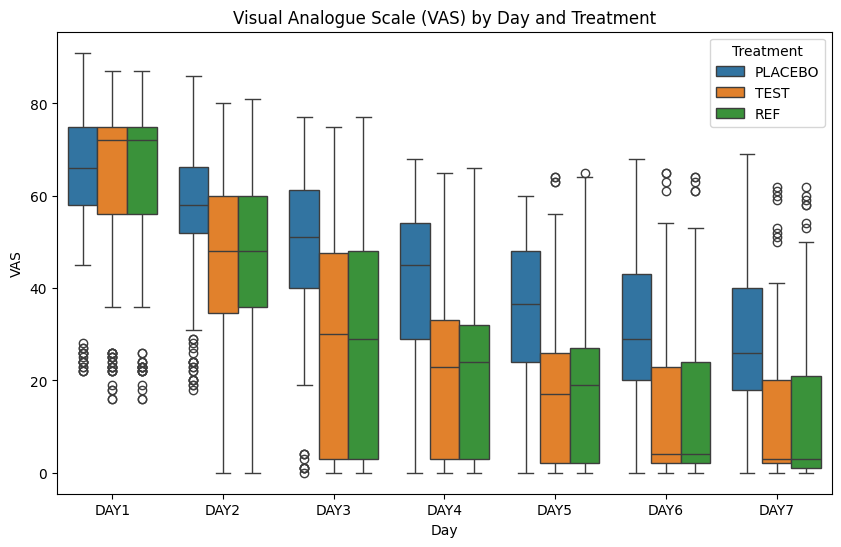

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=vas_merged_data, x='Day', y='VAS', hue='Treatment')
plt.title('Visual Analogue Scale (VAS) by Day and Treatment')
plt.xlabel('Day')
plt.ylabel('VAS')
plt.legend(title='Treatment')
plt.show()

In [30]:
# Pivot VAS data
vas_pivot = vas_merged_data.pivot(index='Patient_ID', columns='Day', values='VAS').reset_index()
# Rename columns for clarity
vas_pivot.columns.name = None

# Calculate change from baseline (Day 1)
for day in ['Day2', 'Day3', 'Day4', 'Day5', 'Day6', 'Day7']:
    vas_pivot[f'Change_{day}'] = vas_pivot[day] - vas_pivot['Day1']

# Merge with randomization data for treatment groups
vas_change_data = randomazedata.merge(vas_pivot, on='Patient_ID', how='inner')

# Summary statistics of change from baseline
change_summary = vas_change_data.groupby('Treatment').agg({
    'Change_Day2': ['mean', 'std', 'median', 'min', 'max'],
    'Change_Day3': ['mean', 'std', 'median', 'min', 'max'],
    'Change_Day4': ['mean', 'std', 'median', 'min', 'max'],
    'Change_Day5': ['mean', 'std', 'median', 'min', 'max'],
    'Change_Day6': ['mean', 'std', 'median', 'min', 'max'],
    'Change_Day7': ['mean', 'std', 'median', 'min', 'max'],
}).reset_index()

print(change_summary)

KeyError: 'Day2'

In [31]:
# Melt data for visualization
vas_melted = pd.melt(vas_change_data, id_vars=['Patient_ID', 'Treatment'],
                     value_vars=['Change_Day2', 'Change_Day3', 'Change_Day4', 'Change_Day5', 'Change_Day6', 'Change_Day7'],
                     var_name='Day', value_name='Change_from_Baseline')

plt.figure(figsize=(10, 6))
sns.boxplot(data=vas_melted, x='Day', y='Change_from_Baseline', hue='Treatment')
plt.title('Change from Baseline in VAS by Day and Treatment')
plt.xlabel('Day')
plt.ylabel('Change from Baseline in VAS')
plt.legend(title='Treatment')
plt.show()

NameError: name 'vas_change_data' is not defined

  Treatment   PGA                                   
            count      mean       std median min max
0   PLACEBO   272  0.937500  0.607267    1.0   0   4
1       REF   261  3.892720  0.333952    4.0   2   4
2      TEST   247  3.890688  0.312664    4.0   3   4


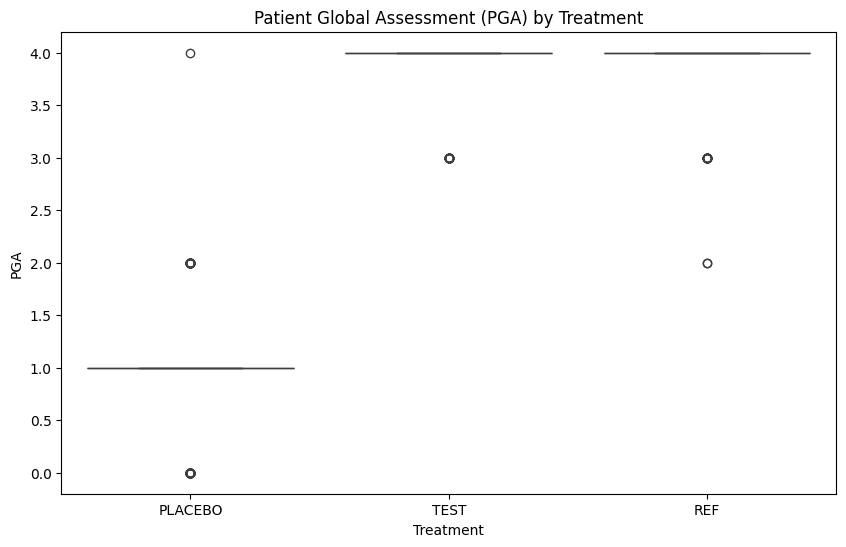

In [32]:
# Merge randomization and global assessment data
global_merged_data = randomazedata.merge(globaldata, on='Patient_ID', how='inner')

# Summary statistics of PGA by treatment groups
pga_summary = global_merged_data.groupby('Treatment').agg({
    'PGA': ['count', 'mean', 'std', 'median', 'min', 'max']
}).reset_index()

print(pga_summary)

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=global_merged_data, x='Treatment', y='PGA')
plt.title('Patient Global Assessment (PGA) by Treatment')
plt.xlabel('Treatment')
plt.ylabel('PGA')
plt.show()

In [33]:
# Merge randomization and AE data
ae_merged_data = randomazedata.merge(aedata, on='Patient_ID', how='inner')

# Summary statistics of adverse events by treatment groups
ae_summary = ae_merged_data.groupby